<p><font size="7" color="red"><center><b>The energy momentum tensor</b></center></font></p>

In [3]:
import sys
sys.path.append('../code/')
from lattice import *
from observable import *
import numpy as np
from initcond import *
import timeit
from eshow import *

Set up the lattice

In [4]:
latt = Lattice(('r tilde', 0.0, 5.0, 201),
                ('vz tilde', 0.0, 15.0, 121),
                ('phir', 40),
                ('theta', 20))

# 1. Background energy

In [5]:
t0 = 0.1
ob = Observable(t0, latt)
ic = InitCond('gaussian', t0, (2, 0.0))

In [6]:
F= ic.gauss(latt)
ob.interp(F)

In [7]:
start = timeit.default_timer()
eLIST = ob.RestFrame(1.0, 0)[0]
end = timeit.default_timer()
print('It takes {} secons.'.format(end - start))
print(eLIST)

It takes 6.613293261999999 secons.
3.6543539919441104


In [7]:
start = timeit.default_timer()
eLIST = ob.RestFrame(1.0, 0)[0]
end = timeit.default_timer()
print('It takes {} secons.'.format(end - start))
print(eLIST)

It takes 5.1824296489999995 secons.
3.654353991944113


In [7]:
start = timeit.default_timer()
eLIST = ob.RestFrame(1.0, 0)[0]
end = timeit.default_timer()
print('It takes {} secons.'.format(end - start))

Tuu takes 7.700939703999996 seconds!

tud takes 1.4765999999610813e-05 seconds!

eig takes 0.00036283800000092015 seconds!

idx takes 6.637399999931404e-05 seconds!

It takes 7.702575402000001 secons.


<font color="red" size=5><b>It is about 10 times slower than Mathematica because I interate it for each $n$.</b></font>

## At $t = 2$

In [5]:
ob.setTime(2.0)

In [6]:
rLIST = np.linspace(0, 4.0, 21)

In [7]:
start = timeit.default_timer()
eLIST = [ob.RestFrame(r, 0)[0] for r in rLIST]
end = timeit.default_timer()
print('It takes {} secons.'.format(end - start))

It takes 75.213548248 secons.


In [8]:
eLIST

[0.009157819444367098,
 0.009297570811590944,
 0.009700061226041112,
 0.010428667737188955,
 0.011464268757601547,
 0.012644762600190438,
 0.013704330626097957,
 0.014339201750969987,
 0.014312039297613452,
 0.01351190756585921,
 0.01200318769834759,
 0.009994282702830004,
 0.007780234385288064,
 0.005649183712163644,
 0.003820854839301866,
 0.0024040646650854503,
 0.0014054399507820703,
 0.0007630485781794894,
 0.00038449000697433737,
 0.0001795639699520521,
 7.779853361816219e-05]

In [14]:
eLIST

[0.009157819444367098,
 0.009297570811590942,
 0.009700061226041112,
 0.010428667737188955,
 0.01146426875760153,
 0.012644762600190497,
 0.013704330626097917,
 0.01433920175097011,
 0.014312039297613488,
 0.01351190756585914,
 0.012003187698347484,
 0.009994282702829838,
 0.00778023438528791,
 0.005649183712163614,
 0.003820854839301824,
 0.0024040646650853787,
 0.0014054399507820406,
 0.0007630485781795233,
 0.0003844900069743182,
 0.00017956396995205613,
 7.779853361815863e-05]

Mathematica: {{0.`, 0.009157819444367096`}, {0.2`, 0.009297570811590944`}, {0.4`, 
  0.009700061226041112`}, {0.6000000000000001`, 
  0.010428667737188948`}, {0.8`, 0.011464268757601533`}, {1.`, 
  0.012644762600190478`}, {1.2000000000000002`, 
  0.013704330626098007`}, {1.4000000000000001`, 
  0.01433920175096999`}, {1.6`, 0.014312039297613585`}, {1.8`, 
  0.013511907565859307`}, {2.`, 0.012003187698347295`}, {2.2`, 
  0.009994282702830051`}, {2.4000000000000004`, 
  0.0077802343852879235`}, {2.6`, 
  0.005649183712163983`}, {2.8000000000000003`, 
  0.003820854839301953`}, {3.`, 0.002404064665085321`}, {3.2`, 
  0.00140543995078201`}, {3.4000000000000004`, 
  0.0007630485781795187`}, {3.6`, 
  0.0003844900069743364`}, {3.8000000000000003`, 
  0.00017956396995205248`}, {4.`, 0.00007779853361815933`}}
  However, taking the eigenvalues take some time about 10 times longer!

In [9]:
start = timeit.default_timer()
eLIST = [[ob.RestFrame(r, theta)[0]
        for theta in latt.lattice[ob.idx_th]]
        for r in rLIST]
end = timeit.default_timer()
print('It takes {} secons.'.format(end - start))

It takes 772.008606371 secons.


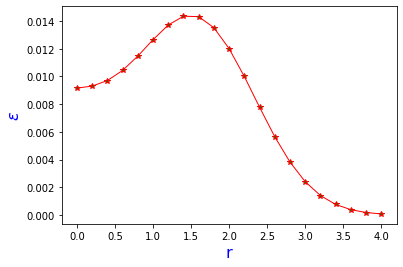

In [10]:
font = {'color':  'blue',
        'size':16}
plt.plot(rLIST, np.array(eLIST)[:, 0], 'r*-', linewidth=1, markerfacecolor="green")
plt.xlabel('r', fontdict=font)
plt.ylabel('$\epsilon$', fontdict=font)
plt.show()

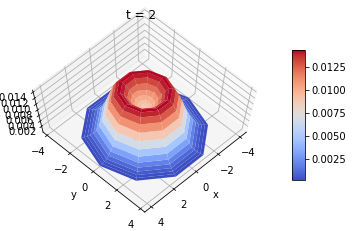

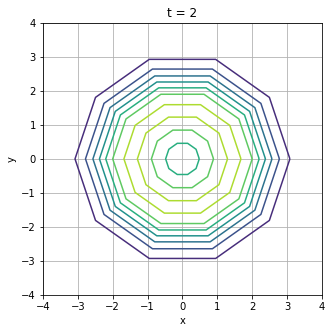

In [12]:
energy3D(rLIST, latt.lattice[ob.idx_th], eLIST, 2)
energyContour(rLIST, latt.lattice[ob.idx_th], eLIST, 2)

# 2. Large anisotropy

In [3]:
t0 = 0.1
ob = Observable(t0, latt)
ic = InitCond('gaussian', t0, (2, 1.0))

((2, 1.0),)


In [4]:
F= ic.gauss(latt)
ob.interp(F)

In [ ]:
ob.calcphir()

In [5]:
ob.setTime(0.1)

In [6]:
ob.RestFrame(0.0, 0.0)[0]

9.900498026205073

In [10]:
print(latt)

Description: ['r tilde', 'vz tilde', 'phir', 'theta']
Shape: [201, 121, 40, 20]


In [12]:
latt.lattice[ob.idx_th]

array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
       1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
       3.14159265, 3.45575192, 3.76991118, 4.08407045, 4.39822972,
       4.71238898, 5.02654825, 5.34070751, 5.65486678, 5.96902604])

In [7]:
ob.RestFrame(0.1, 0.31415927)[0]

7.905121439957258

In [8]:
ob.RestFrame(0.5, 0.31415927)[0]

13.670586256650779

In [9]:
ob.RestFrame(1.0, 0.62831853)[0]

4.755402469723735

In [10]:
ob.setTime(2.0)

In [11]:
ob.RestFrame(1.0, 0.62831853)[0]

0.010709762768256604

## At $t = t_0$

In [12]:
rLIST = np.linspace(0, 2.0, 11)

In [13]:
ob.setTime(t0)

In [14]:
start = timeit.default_timer()
eLIST = [[ob.RestFrame(r, theta)[0]
        for theta in latt.lattice[ob.idx_th]]
        for r in rLIST]
end = timeit.default_timer()
print('It takes {} secons.'.format(end - start))

It takes 1456.2350987940001 secons.


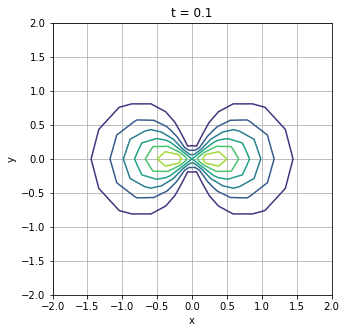

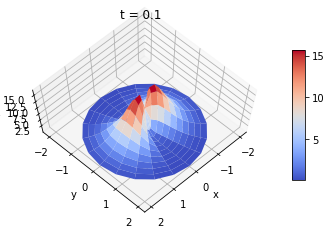

In [15]:
energyContour(rLIST, latt.lattice[ob.idx_th], eLIST, t0)
energy3D(rLIST, latt.lattice[ob.idx_th], eLIST, t0)

In [16]:
np.savez_compressed('e.0.1',e01=eLIST, r01=rLIST)

In [17]:
eload = np.load('e.0.1.npz')

In [18]:
eload['e01']

array([[9.90049803e+00, 9.90049804e+00, 9.90049811e+00, 9.90049820e+00,
        9.90049829e+00, 9.90049833e+00, 9.90049832e+00, 9.90049825e+00,
        9.90049816e+00, 9.90049807e+00, 9.90049803e+00, 9.90049804e+00,
        9.90049811e+00, 9.90049820e+00, 9.90049829e+00, 9.90049833e+00,
        9.90049832e+00, 9.90049825e+00, 9.90049816e+00, 9.90049807e+00],
       [1.66274023e+01, 1.49984630e+01, 1.07545932e+01, 5.64103381e+00,
        2.42941843e+00, 2.27375910e+00, 2.42941841e+00, 5.64103377e+00,
        1.07545931e+01, 1.49984630e+01, 1.66274023e+01, 1.49984630e+01,
        1.07545932e+01, 5.64103381e+00, 2.42941843e+00, 2.27375910e+00,
        2.42941841e+00, 5.64103377e+00, 1.07545931e+01, 1.49984630e+01],
       [1.63527804e+01, 1.47760116e+01, 1.06489340e+01, 5.55331824e+00,
        1.48202624e+00, 5.24073284e-01, 1.48202624e+00, 5.55331823e+00,
        1.06489340e+01, 1.47760116e+01, 1.63527804e+01, 1.47760116e+01,
        1.06489340e+01, 5.55331824e+00, 1.48202624e+00, 5.2407

In [19]:
eload['r01']

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

## At $t = 2.0$

In [20]:
t = 2.0
ob.setTime(t)
rLIST = np.linspace(0, 4.0, 11)

In [21]:
start = timeit.default_timer()
eLIST = [[ob.RestFrame(r, theta)[0]
        for theta in latt.lattice[ob.idx_th]]
        for r in rLIST]
end = timeit.default_timer()
print('It takes {} secons.'.format(end - start))

It takes 1444.3144534360001 secons.


In [22]:
np.savez_compressed('e.2',e2=eLIST, r2=rLIST)

In [23]:
eload = np.load('e.2.npz')

In [24]:
eload['e2']

array([[9.15781918e-03, 9.15781920e-03, 9.15781926e-03, 9.15781935e-03,
        9.15781943e-03, 9.15781947e-03, 9.15781945e-03, 9.15781939e-03,
        9.15781930e-03, 9.15781922e-03, 9.15781918e-03, 9.15781920e-03,
        9.15781926e-03, 9.15781935e-03, 9.15781943e-03, 9.15781947e-03,
        9.15781945e-03, 9.15781939e-03, 9.15781930e-03, 9.15781922e-03],
       [8.76785047e-03, 8.91596433e-03, 9.29922650e-03, 9.76509635e-03,
        1.01365713e-02, 1.02773321e-02, 1.01365714e-02, 9.76509642e-03,
        9.29922654e-03, 8.91596434e-03, 8.76785047e-03, 8.91596433e-03,
        9.29922650e-03, 9.76509635e-03, 1.01365713e-02, 1.02773321e-02,
        1.01365714e-02, 9.76509642e-03, 9.29922654e-03, 8.91596434e-03],
       [7.98942355e-03, 8.58440744e-03, 1.00593979e-02, 1.17763838e-02,
        1.31113369e-02, 1.36119590e-02, 1.31113370e-02, 1.17763840e-02,
        1.00593981e-02, 8.58440751e-03, 7.98942355e-03, 8.58440744e-03,
        1.00593979e-02, 1.17763838e-02, 1.31113369e-02, 1.3611

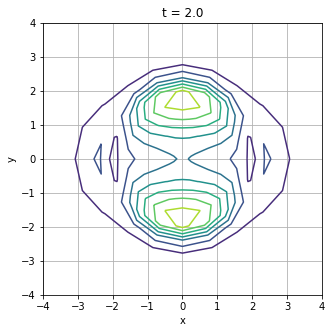

In [25]:
energyContour(rLIST, latt.lattice[ob.idx_th], eLIST, t)

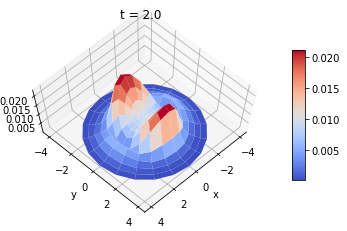

In [26]:
energy3D(rLIST, latt.lattice[ob.idx_th], eLIST, t)

## At $t = 4.0$

In [27]:
t = 4.0
ob.setTime(t)
rLIST = np.linspace(0, 6.0, 11)

In [28]:
start = timeit.default_timer()
eLIST = [[ob.RestFrame(r, theta)[0]
        for theta in latt.lattice[ob.idx_th]]
        for r in rLIST]
end = timeit.default_timer()
print('It takes {} secons.'.format(end - start))

It takes 1470.491671882 secons.


In [29]:
np.savez_compressed('e.4',e4=eLIST, r4=rLIST)

In [30]:
eload = np.load('e.4.npz')

In [31]:
eload['e4']

array([[2.81337930e-08, 2.81337930e-08, 2.81337932e-08, 2.81337935e-08,
        2.81337937e-08, 2.81337938e-08, 2.81337938e-08, 2.81337936e-08,
        2.81337933e-08, 2.81337931e-08, 2.81337930e-08, 2.81337930e-08,
        2.81337932e-08, 2.81337935e-08, 2.81337937e-08, 2.81337938e-08,
        2.81337938e-08, 2.81337936e-08, 2.81337933e-08, 2.81337931e-08],
       [1.13630436e-07, 1.08531469e-07, 9.98252179e-08, 9.86373612e-08,
        1.04081021e-07, 1.07287350e-07, 1.04081022e-07, 9.86373638e-08,
        9.98252204e-08, 1.08531471e-07, 1.13630436e-07, 1.08531469e-07,
        9.98252179e-08, 9.86373612e-08, 1.04081021e-07, 1.07287350e-07,
        1.04081022e-07, 9.86373638e-08, 9.98252204e-08, 1.08531471e-07],
       [2.01592134e-06, 1.83721289e-06, 1.43793834e-06, 1.18617743e-06,
        1.22844263e-06, 1.28977214e-06, 1.22844267e-06, 1.18617745e-06,
        1.43793833e-06, 1.83721287e-06, 2.01592134e-06, 1.83721289e-06,
        1.43793834e-06, 1.18617743e-06, 1.22844263e-06, 1.2897

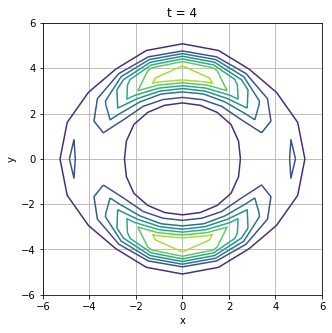

In [32]:
energyContour(eload['r4'], latt.lattice[ob.idx_th], eload['e4'], 4)

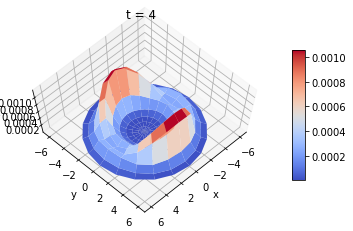

In [33]:
energy3D(eload['r4'], latt.lattice[ob.idx_th], eload['e4'], 4)

# 3. Check interpolation

In [9]:
t0 = 0.1
ob = Observable(t0, latt)
ic = InitCond('gaussian', t0, (2, 1.0))

((2, 1.0),)


In [10]:
F= ic.gauss(latt)
ob.interp(F)

In [13]:
latt.lattice

[array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   , 1.025, 1.05 , 1.075, 1.1  ,
        1.125, 1.15 , 1.175, 1.2  , 1.225, 1.25 , 1.275, 1.3  , 1.325,
        1.35 , 1.375, 1.4  , 1.425, 1.45 , 1.475, 1.5  , 1.525, 1.55 ,
        1.575, 1.6  , 1.625, 1.65 , 1.675, 1.7  , 1.725, 1.75 , 1.775,
        1.8  , 1.825, 1.85 , 1.875, 1.9  , 1.925, 1.95 , 1.975, 2.   ,
        2.025, 2.05 , 2.075, 2.1  , 2.125, 2.15 , 2.175, 2.2  , 2.225,
        2.25 , 2.275, 2.3  , 2.325, 2.35 , 2.375, 2.4  , 2.425, 2.45 ,
        2.475, 2.5  , 2.525, 2.55 , 2.575, 2.6  , 2.625, 2.65 , 2.675,
        2.7  , 2.725, 2.75 , 2.775, 2.8  , 2.825, 2.85 , 2.875, 2.9  ,
        2.925, 2.95 , 2.975, 3.   , 3.025, 3.05 , 3.075, 3.1  , 3.125,
      